# Autoencoders Implementation in Python

#### Autoencoders
Autoencoders are neural networks used for unsupervised learning, specifically for dimensionality reduction and feature extraction. They work by encoding input data into a compressed (latent) representation and then reconstructing the original input from this representation. Autoencoders are useful for tasks like denoising, anomaly detection and pretraiing for other neural networks.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Compressed Representation (1000, 2)


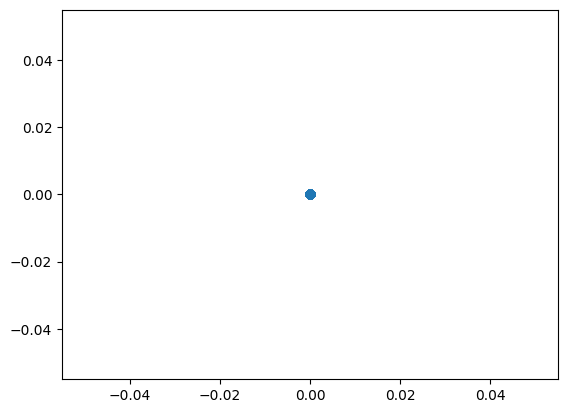

In [4]:
# import necessary libraires
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np

# sample data (e.g points in 5 dimensional space)
X = np.random.rand(1000, 5)

# Define the auto encoder model
input_dim = X.shape[1]
encoding_dim = 2 # compressing to 2 dimensions

# encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train the model
autoencoder.fit(X,X, epochs=100, batch_size=2, verbose=0)

# get the encoded representation
encoder = Model(inputs=input_layer, outputs=encoded)
X_compressed = encoder.predict(X)
print("Compressed Representation", X_compressed.shape)

# visualise the compressed representation
import matplotlib.pyplot as plt
plt.scatter(X_compressed[:, 0], X_compressed[:, 1])
plt.show()